In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import hvplot.pandas
import panel as pn
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import quandl
import datetime
import seaborn as sns
import pandas_datareader as pdr
from datapackage import Package
import csv

In [70]:
#Pull Agri INDEX data over the last 5 years (1/2014-9/2019) from Yahoo using pandas_datareader
start_sp = datetime.datetime(2008,1,1)
end_sp = datetime.datetime(2019,12,1)
USAG = pdr.get_data_yahoo('USAG',
                          start_sp,
                            end_sp)

In [71]:
USAG.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-10,24.129999,24.090000,24.090000,24.129999,900,24.129999
2012-05-11,24.110001,23.950001,24.080000,23.950001,900,23.950001
2012-05-14,23.950001,23.950001,23.950001,23.950001,0,23.950001
2012-05-15,23.900000,23.879999,23.900000,23.879999,400,23.879999
2012-05-16,24.200001,24.129999,24.200001,24.150000,8700,24.150000
2012-05-17,24.290001,24.080000,24.080000,24.290001,6900,24.290001
2012-05-18,24.469999,24.230000,24.360001,24.320000,48400,24.320000
2012-05-21,24.530001,24.299999,24.490000,24.370001,35300,24.370001
2012-05-22,24.370001,24.370001,24.370001,24.370001,0,24.370001


In [16]:
crops = Path("final_features_4.csv")
df = pd.read_csv(crops)

In [ ]:
df = pd.read_csv('C:/Users/Owner/Downloads/world_bank_data-utf.csv')

In [ ]:
df.loc[df['Country Name'] == 'United States',['Country Name','2014','2015','2016','2017','2018']]

In [ ]:
us_gdp2 = us_gdp[4:]
us_gdp3 = us_gdp2.loc['2008':'2014']
us_gdp3

In [67]:
#df['Month'].isin(range(0, 5))

In [18]:
df.keys()

Index(['Unnamed: 0', 'county_code', 'county_name', 'state_ansi', 'state_name',
       'state_alpha', 'commodity_desc', 'state_fips_code', 'year',
       'area_harvested', 'area_planted', 'production', 'YIELD', 'total_acres',
       'total_imdemnity', 'total_events', 'PCP', 'TAVG', 'PDSI', 'ZNDX',
       'PMDI', 'TMIN', 'TMAX', 'Month'],
      dtype='object')

In [22]:
list(range(2014,2018))

[2014, 2015, 2016, 2017]

In [81]:
train_idx = df['year'].isin(range(2014,2018))
x_columns = ['production','total_acres','total_imdemnity', 'area_harvested','area_planted', 'total_events', 'PCP', 'TAVG', 'PDSI', 'ZNDX',
       'PMDI', 'TMIN', 'TMAX',]
x_train = df.loc[train_idx,x_columns]
y_col = "YIELD"
y_train = df.loc[train_idx,y_col]

test_idx = df['year']==2018
x_test = df.loc[test_idx,x_columns]
y_test = df.loc[test_idx,y_col]



In [82]:
y_train.shape

(391,)

In [83]:
x_train.shape

(391, 13)

In [84]:
x_train.isnull().sum()

production         0
total_acres        0
total_imdemnity    0
area_harvested     0
area_planted       0
total_events       0
PCP                0
TAVG               0
PDSI               0
ZNDX               0
PMDI               0
TMIN               0
TMAX               0
dtype: int64

In [85]:
# Create a scatter plot of the data
#plt.scatter(df.year, df.total_imdemnity)

#Create Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

#Using Total Areas as Y and the rest of data as our x
#X = df.index.values.reshape(-1,1)
#y = df['YIELD']

# Fit the model to the data
model.fit(x_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
model.coef_

array([ 1.24133980e-06, -1.72422079e-05, -8.63948816e-07])

In [77]:
model.coef_

array([ 8.52510915e-06,  6.17430683e-05, -4.79031946e-07, -5.35659650e-04,
        6.51992468e-05, -4.48573274e-02, -1.01607611e-01,  2.41882855e-02,
        1.11897246e-01, -2.24613934e-01,  1.40767470e-01,  1.03473307e-01,
       -5.78646552e-02,  0.00000000e+00])

In [86]:
model.coef_

array([ 8.52510915e-06,  6.17430683e-05, -4.79031946e-07, -5.35659650e-04,
        6.51992468e-05, -4.48573274e-02, -1.01607611e-01,  2.41882855e-02,
        1.11897246e-01, -2.24613934e-01,  1.40767470e-01,  1.03473307e-01,
       -5.78646552e-02])

In [68]:
# Make predictions about data to analyze 
predicted_y_values = model.predict(X)
predicted_y_values

ValueError: shapes (482,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)

In [47]:
# Make predictions about data to analyze 
predicted_y_values = model.predict(x_train)
predicted_y_values


array([59.75350915, 60.15962255, 58.51192645, 56.07685111, 56.97714522,
       59.9118218 , 61.04079744, 57.55834203, 58.04724488, 63.64552402,
       60.05718454, 62.70164488, 56.26066032, 56.76456753, 56.27707667,
       56.99017126, 56.67398843, 57.69734395, 66.26322462, 54.93687187,
       56.85525987, 56.50586154, 59.54988595, 51.76584835, 56.4957323 ,
       54.16279901, 55.77769306, 54.42279088, 53.81652554, 54.79997744,
       53.09313573, 56.70914697, 55.35905576, 53.97740293, 57.22620557,
       59.82445828, 59.13981022, 61.28688746, 59.0366395 , 57.10991801,
       57.81582838, 57.5432468 , 58.33953   , 59.27615962, 60.67352953,
       59.94855335, 57.89717365, 57.14532875, 60.41360308, 58.56294241,
       57.71352331, 61.05439661, 60.31930056, 55.27354128, 57.74038804,
       58.10934801, 59.84512741, 61.3798017 , 61.36900539, 58.40476827,
       56.53289483, 57.00081582, 54.2983496 , 56.49963974, 55.08661735,
       57.11981129, 55.4966743 , 55.72326185, 55.4009877 , 54.83

ValueError: x and y must have same first dimension, but have shapes (482, 1) and (391,)

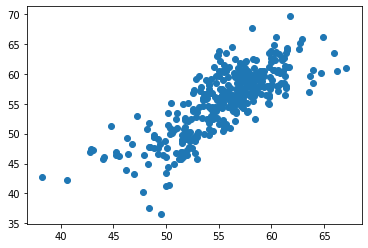

In [56]:
# Plot X and y as a scatter plot
# Plot X and the predictions as a red line plot
plt.scatter(predicted_y_values, y_train)
plt.plot(X, predicted_y_values, color='red')


#model.coef_
#model.intercept_

#Percent of the model that fits
#model.score(X, y, sample_weight=None)

In [5]:
df.index.dtype

dtype('int64')

In [6]:
df = pd.read_csv(
    Path("crops.csv"), parse_dates=True, index_col="year"
)

In [7]:
df.index.dtype

dtype('<M8[ns]')

In [4]:
train = df['2014':'2018']
test = df['2019']

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2014] of <class 'str'>